In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import TensorBoard
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
tb = TensorBoard(log_dir='./Graph_005', histogram_freq=1, write_graph=True, write_images=True)

Using TensorFlow backend.


In [2]:
higgs = np.loadtxt('../data/higgs_001.csv', delimiter=',')

In [3]:
# split out the response
X = higgs[:,1:29]
y = higgs[:,0]

# free up memory space
del higgs

# scale the data
mm_scale = MinMaxScaler()
Xscl = mm_scale.fit_transform(X)

# free up memory space
del X

# train, test, split
X_train, X_test, y_train, y_test = train_test_split(Xscl, y, train_size = .8, test_size=.2, random_state=1, stratify=y)

# free up memory space
del Xscl

In [4]:
# parameters
myUnits = 5
myEpochs = 50
myBatchSize = 10

In [5]:
# model definition
model = Sequential()
model.add(Dense(myUnits, input_dim=28, activation='relu'))
model.add(Dense(myUnits, activation='relu'))
model.add(Dense(myUnits, activation='relu'))
model.add(Dense(myUnits, activation='relu'))
model.add(Dense(myUnits, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
%%time

# fit the model
myLog = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=myEpochs, batch_size=myBatchSize,
                  callbacks=[tb])

Instructions for updating:
Use tf.cast instead.
Train on 8800 samples, validate on 2200 samples
Epoch 1/50
8800/8800 [==============================] - 8s 917us/step - loss: 0.6911 - acc: 0.5352 - val_loss: 0.6899 - val_acc: 0.5373
Epoch 2/50
8800/8800 [==============================] - 7s 824us/step - loss: 0.6882 - acc: 0.5394 - val_loss: 0.6869 - val_acc: 0.5432
Epoch 3/50
8800/8800 [==============================] - 7s 842us/step - loss: 0.6842 - acc: 0.5491 - val_loss: 0.6895 - val_acc: 0.5514
Epoch 4/50
8800/8800 [==============================] - 7s 813us/step - loss: 0.6800 - acc: 0.5613 - val_loss: 0.6768 - val_acc: 0.5782
Epoch 5/50
8800/8800 [==============================] - 7s 798us/step - loss: 0.6737 - acc: 0.5833 - val_loss: 0.6673 - val_acc: 0.5927
Epoch 6/50
8800/8800 [==============================] - 7s 829us/step - loss: 0.6661 - acc: 0.5902 - val_loss: 0.6658 - val_acc: 0.5991
Epoch 7/50
8800/8800 [==============================] - 7s 808us/step - loss: 0.6603 - a

In [8]:
# get auc score
pred = model.predict(X_test)
roc_auc_score(y_test, pred)

0.6884847549644261

In [9]:
# Access results
print(myLog.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


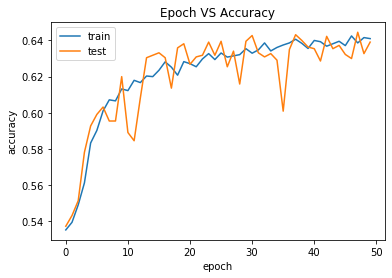

In [10]:
# Plot epoch vs accuracy
plt.plot(myLog.history['acc'])
plt.plot(myLog.history['val_acc'])
plt.title('Epoch VS Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

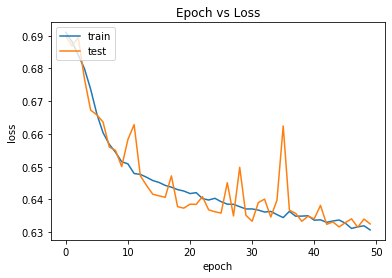

In [11]:
# Plot epoch vs loss
plt.plot(myLog.history['loss'])
plt.plot(myLog.history['val_loss'])
plt.title('Epoch vs Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13000390848906081984
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 10939400015804038125
physical_device_desc: "device: XLA_CPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5829230592
locality {
  bus_id: 1
  links {
  }
}
incarnation: 7456380654180747063
physical_device_desc: "device: 0, name: GeForce GTX 1060 6GB, pci bus id: 0000:04:00.0, compute capability: 6.1"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10548826874450426107
physical_device_desc: "device: XLA_GPU device"
]


In [13]:
from keras import backend
assert len(backend.tensorflow_backend._get_available_gpus()) > 0

In [14]:
# from keras import backend as K
# K.tensorflow_backend._get_available_gpus()

In [15]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 145       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 6         
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot
keras.utils.vis_utils.pydot = pydot

In [30]:
plot_model(model, to_file='model.png')

In [32]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)